# Project 1

Project Members: Jesus Casas Luis Cedeno

Comp 541 April 27 25


# Frequent Pattern Mining, Advanced (100% + 20%)

You are allowed to use any platform to complete the project (e.g., Google Colab, a local Python environment, etc.).

You do not need to share the link with the professor.

Mine patterns from the full dataset without sampling, using either the Apriori or FP-Growth algorithm. This project can be considered an extension of Assignment 3.

• In Assignment 3, we mined some strong association rules:

| antecedents | consequents | antecedent support | consequent support | support | confidence | lift | leverage | conviction | zhangs_metric | antecedents_name | consequents_name |
|:-----------:|:-----------:|:------------------:|:------------------:|:-------:|:----------:|:----:|:--------:|:-----------:|:-------------:|:----------------:|:----------------:|
| (13176)     | (47209)     | 0.117980            | 0.055583            | 0.018444| 0.156331   | 2.812560 | 0.011886 | 1.119416    | 0.730654       | [Bag of Organic Bananas] | [Organic Hass Avocado] |
| (47209)     | (13176)     | 0.055583            | 0.117980            | 0.018444| 0.331825   | 2.812560 | 0.011886 | 1.320044    | 0.682381       | [Organic Hass Avocado] | [Bag of Organic Bananas] |
| (47209)     | (21137)     | 0.055583            | 0.083028            | 0.011729| 0.211024   | 2.541609 | 0.007114 | 1.162231    | 0.642246       | [Organic Hass Avocado] | [Organic Strawberries] |
| (21137)     | (47209)     | 0.083028            | 0.055583            | 0.011729| 0.141270   | 2.541609 | 0.007114 | 1.099784    | 0.661469       | [Organic Strawberries] | [Organic Hass Avocado] |
| (13176)     | (27966)     | 0.117980            | 0.042268            | 0.013566| 0.114987   | 2.720400 | 0.008579 | 1.082167    | 0.716998       | [Bag of Organic Bananas] | [Organic Raspberries] |

Unfortunately, the results were not particularly ”interesting,” since people often purchase fruits and vegetables together. This is common sense and not very informative.

**Therefore, in this project, our goal is to discover insights that go beyond common sense.**

# Problem 1 Continued

# Your task:

## 1. Read the metadata (Description). This will help you understand the data and related information.

## 1. Find basic statistical information about the data and choose appropriate methods to visualize it.

Here are some ideas you might be interested in exploring. Note that all your results should present their correlated names instead of IDs, e.g., Produce department, whole milk, etc.:

- Top 10 popular products.

- Distribution of the number of products per transaction.

-  Order distribution by day of the week and order hour of the day (in orders.csv).

- Items sold by department.

You don’t have to follow the ideas above, but you should include at least 3 statistical
pieces of information in your presentation and report, using appropriate visualization
methods and text to describe why it is informative.

## 3. As shown above, the pattern mined in the previous assignment is not interesting.

More specifically, if we check their correlated aisle and department, you will notice:

|antecedents_name|antecedents_aisle | antecedents_department | consequents_name| consequents_aisle | consequents_department |
|:--------:|:-----------:|:------------:|:----------:|:--------:|:----------:|
| Bag of Organic Bananas| 24 | 4 | Organic Hass Avocado   | 24    | 4 |
| Organic Hass Avocado     | 24                | 4                       | Bag of Organic Bananas | 24                | 4                       |
| Organic Hass Avocado     | 24                | 4                       | Organic Strawberries   | 24                | 4                       |
| Organic Strawberries     | 24                | 4                       | Organic Hass Avocado   | 24                | 4                       |
| Organic Hass Avocado     | 24                | 4                       | Organic Baby Spinach   | 123               | 4                       |

Apparently, they all come from the same department “4, produce” in departments.csv.
Therefore, we may try to mine strong associations across different departments.
Another strategy is to find patterns in multilevel associations, i.e., frequent pat-
tern/association rules across aisles/departments. Rare/negative associated patterns
might also be considered.

Complete both methods and report your find.

In this project, the minimum support and minimum confidence are not pre-defined.
You can choose your own appropriate thresholds for your work. Choose and clarify it
in your final report.

In [1]:
# Importing the dataset from Google Drive
import pandas as pd

aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products__train = pd.read_csv("order_products__train.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
products_with_price = pd.read_csv("products_with_price.csv")

# Displaying the first 5 rows
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## 1. Top 10 Popular Products

product_name
Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Name: count, dtype: int64


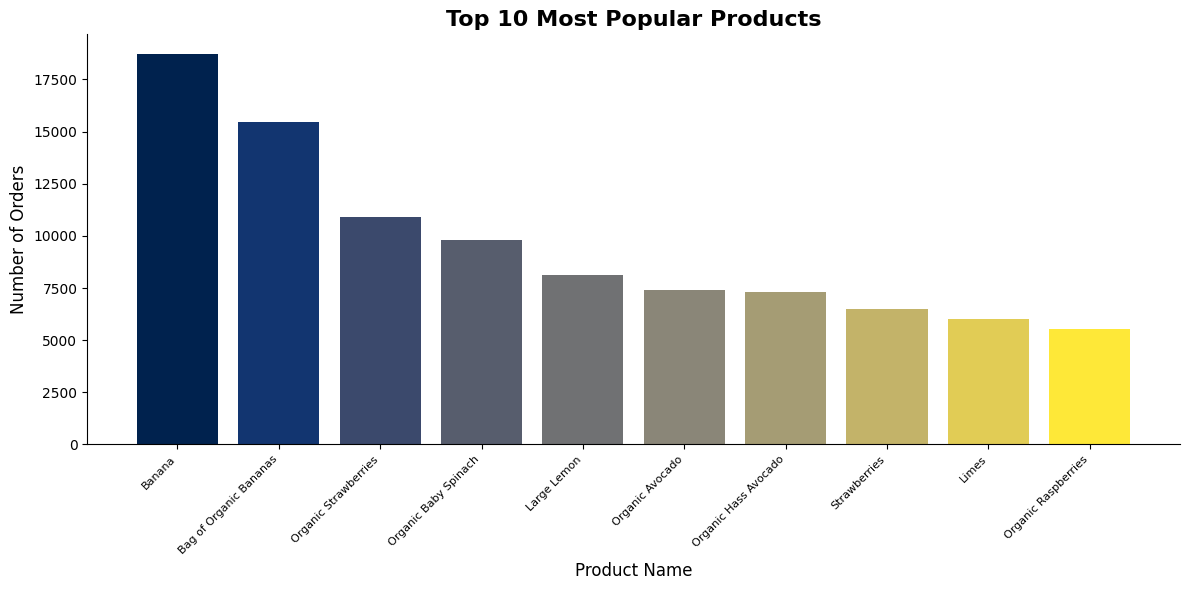

In [2]:
# Merge necessary dataframes
product_info = pd.merge(products, aisles, on='aisle_id')
product_info = pd.merge(product_info, departments, on='department_id')
order_product_info = pd.merge(order_products__train, product_info, on='product_id')
# Count product occurrences
product_counts = order_product_info['product_name'].value_counts()

# Get the top 0 most popular products
top_10_products = product_counts.head(10)

# Print or visualize the results
print(top_10_products)

# Example visualization (bar chart)
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))
# number of bars
n = len(top_10_products)

colors = plt.cm.cividis(np.linspace(0, 1, n))
bars = ax.bar(
    top_10_products.index,
    top_10_products.values,
    color=colors
)

ax.set_title('Top 10 Most Popular Products', fontsize=16, fontweight='bold')
ax.set_xlabel('Product Name', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)

# force all 20 labels, rotate, and shrink font if needed
ax.set_xticks(range(len(top_10_products)))
ax.set_xticklabels(
    top_10_products.index,
    rotation=45,
    ha='right',
    fontsize=8
)

# push the plot up so labels aren’t cut off
plt.subplots_adjust(bottom=0.35)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


## 2. Distribution of the number of products per transaction

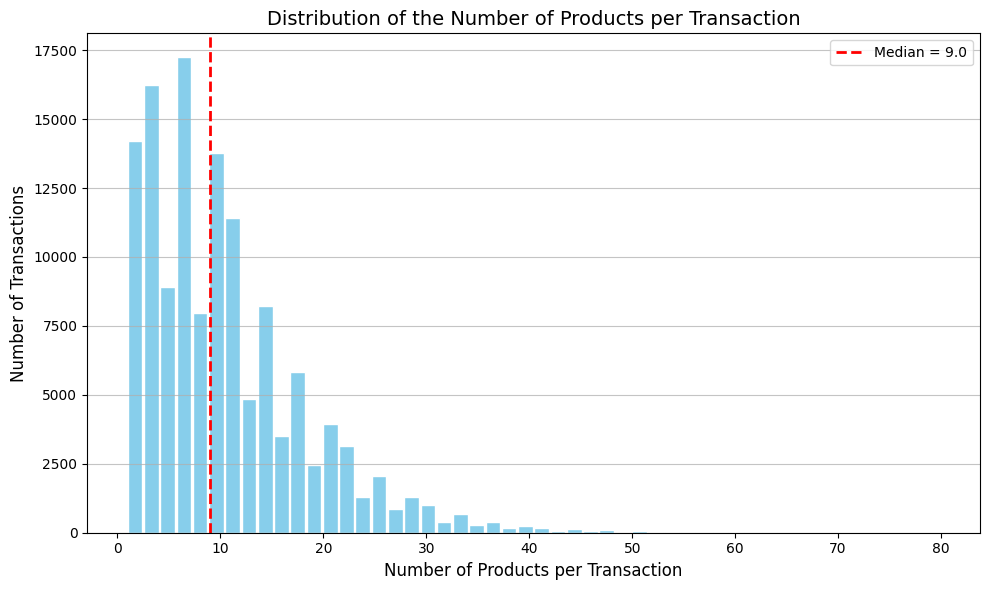

In [3]:
# Distribution of the number of products per transaction
order_counts = order_products__train.groupby('order_id')['product_id'].count()
# Compute the counts and bin edges yourself
counts, bin_edges = np.histogram(order_counts, bins=50)

fig, ax = plt.subplots(figsize=(10, 6))

# 1) Draw bars with a little “rwidth” (<1.0) to create gaps
ax.bar(
    bin_edges[:-1],
    counts,
    width=(bin_edges[1] - bin_edges[0]) * 0.9,  # 90% of the bin width
    align='edge',
    color='skyblue',
    edgecolor='white'
)

# 2) Add a median line
median_val = order_counts.median()
ax.axvline(
    median_val,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Median = {median_val:.1f}'
)

# Labels and styling
ax.set_xlabel('Number of Products per Transaction', fontsize=12)
ax.set_ylabel('Number of Transactions', fontsize=12)
ax.set_title('Distribution of the Number of Products per Transaction', fontsize=14)
ax.grid(axis='y', alpha=0.75)
ax.legend()

plt.tight_layout()
plt.show()


## 3. Order distribution by day of the week and order hour of the day (in orders.csv)

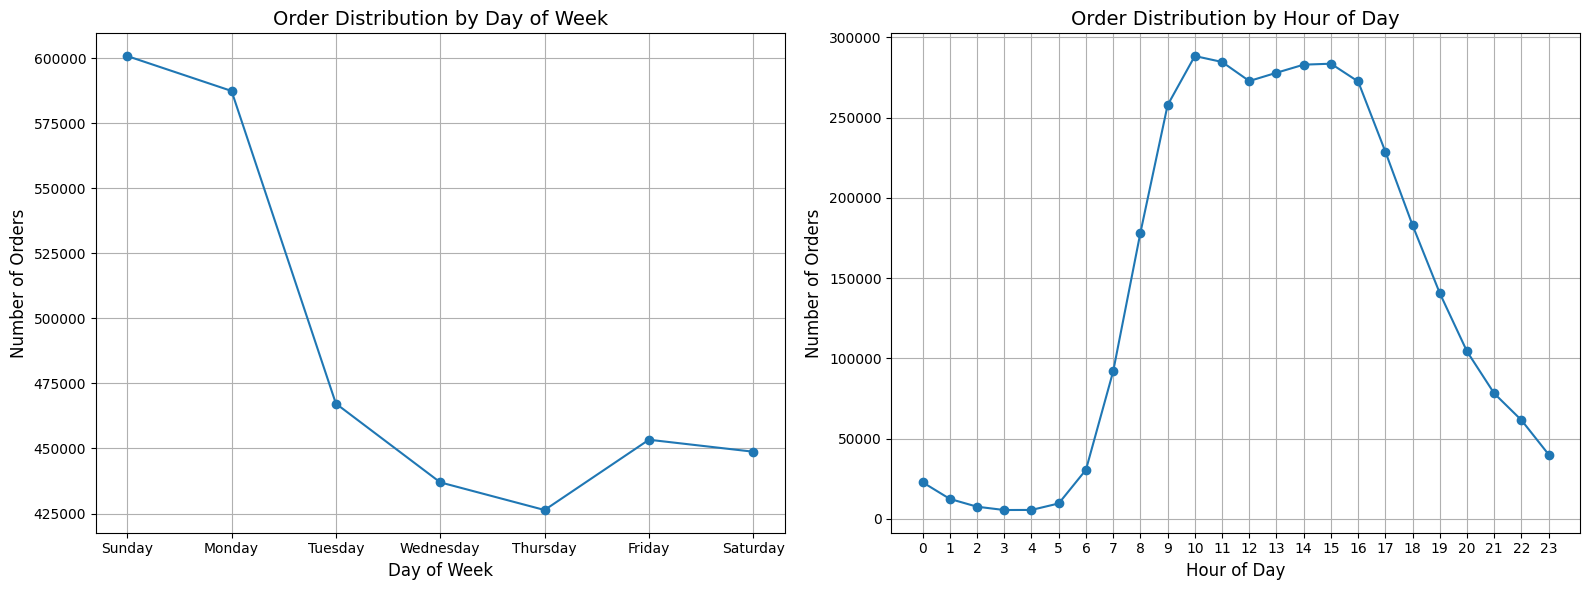

In [4]:
# prompt: Order distribution by day of the week and order hour of the day (in orders.csv)

# Order distribution by day of the week and order hour of the day
order_counts_dow = orders.groupby('order_dow')['order_id'].count()
order_counts_hour = orders.groupby('order_hour_of_day')['order_id'].count()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for day of week
axes[0].plot(order_counts_dow.index, order_counts_dow.values, marker='o')
axes[0].set_xlabel('Day of Week', fontsize=12)
axes[0].set_ylabel('Number of Orders', fontsize=12)
axes[0].set_title('Order Distribution by Day of Week', fontsize=14)
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
axes[0].grid(True)


# Plot for hour of day
axes[1].plot(order_counts_hour.index, order_counts_hour.values, marker='o')
axes[1].set_xlabel('Hour of Day', fontsize=12)
axes[1].set_ylabel('Number of Orders', fontsize=12)
axes[1].set_title('Order Distribution by Hour of Day', fontsize=14)
axes[1].set_xticks(range(24))
axes[1].grid(True)

plt.tight_layout()
plt.show()


## 4. Items sold by department

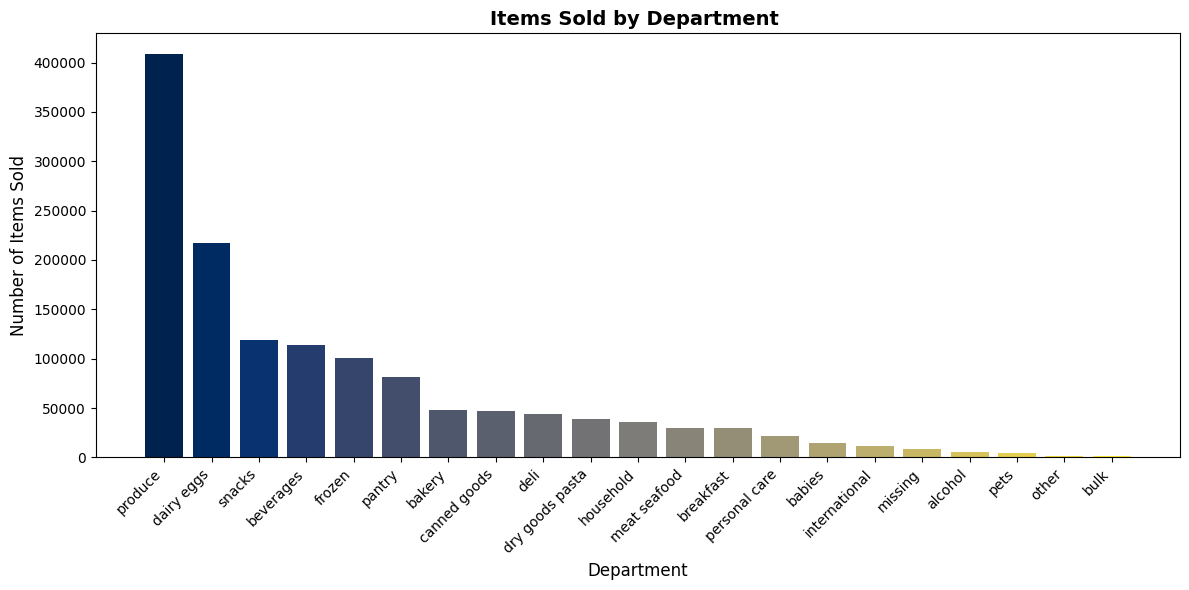

In [5]:

# Count items per department and sort descending
items_by_department = (
    order_product_info
      .groupby('department')['product_id']
      .count()
      .sort_values(ascending=False)
)

# Generate a cividis gradient spanning all bars
n = len(items_by_department)
colors = plt.cm.cividis(np.linspace(0, 1, n))

# Plot
plt.figure(figsize=(12, 6))
plt.bar(
    items_by_department.index,
    items_by_department.values,
    color=colors
)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Number of Items Sold", fontsize=12)
plt.title("Items Sold by Department ", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

## 3a. Association Patterns Across Items Between Departments. Item -> Item

In [6]:
""" Step 3a - Apriori: Find product-to-product rules across different departments """
from mlxtend.frequent_patterns import apriori, association_rules

# Merge to get product and department info
merged = order_products__train.merge(products, on="product_id", how="left") \
                              .merge(aisles, on="aisle_id", how="left") \
                              .merge(departments, on="department_id", how="left")

# Limit to top 15000 products by frequency
top_products = merged['product_name'].value_counts().head(5000).index.tolist()
filtered = merged[merged['product_name'].isin(top_products)]

# Rebuild basket
basket_small = filtered.groupby(['order_id', 'product_name'])['add_to_cart_order'].count().unstack().fillna(0)
basket_small = basket_small.astype(bool)

# Lower thresholds
frequent_itemsets_apriori = apriori(basket_small, min_support=0.005, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.19)

# Map each product to its department
product_to_dept = merged.drop_duplicates(subset='product_name')[['product_name', 'department']].set_index('product_name')['department'].to_dict()

# Helper to find departments from product sets
def dept_of(itemset):
    return [product_to_dept.get(item, 'Unknown') for item in itemset]

# Filter only rules with different departments
rules_apriori['ante_dept'] = rules_apriori['antecedents'].apply(lambda x: dept_of(x))
rules_apriori['conseq_dept'] = rules_apriori['consequents'].apply(lambda x: dept_of(x))

cross_dept_rules = rules_apriori[rules_apriori.apply(
    lambda row: set(row['ante_dept']) != set(row['conseq_dept']), axis=1
)]

# Show top 10 cross-department product rules
print(cross_dept_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'ante_dept', 'conseq_dept']].head())


                     antecedents               consequents   support  \
20          (Organic Whole Milk)  (Bag of Organic Bananas)  0.008699   
24                 (Blueberries)                  (Banana)  0.005571   
39          (Organic Whole Milk)                  (Banana)  0.008123   
41             (Original Hummus)                  (Banana)  0.005065   
45  (Sparkling Water Grapefruit)                  (Banana)  0.005174   

    confidence      lift     ante_dept conseq_dept  
20    0.227791  1.891227  [dairy eggs]   [produce]  
24    0.308222  2.115418      [frozen]   [produce]  
39    0.212714  1.459918  [dairy eggs]   [produce]  
41    0.227782  1.563332        [deli]   [produce]  
45    0.197976  1.358764   [beverages]   [produce]  


In [7]:
# Show top 10 cross-department product rules
print(cross_dept_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'ante_dept', 'conseq_dept']].head(40))

                     antecedents               consequents   support  \
20          (Organic Whole Milk)  (Bag of Organic Bananas)  0.008699   
24                 (Blueberries)                  (Banana)  0.005571   
39          (Organic Whole Milk)                  (Banana)  0.008123   
41             (Original Hummus)                  (Banana)  0.005065   
45  (Sparkling Water Grapefruit)                  (Banana)  0.005174   
68          (Organic Whole Milk)    (Organic Strawberries)  0.007423   

    confidence      lift     ante_dept conseq_dept  
20    0.227791  1.891227  [dairy eggs]   [produce]  
24    0.308222  2.115418      [frozen]   [produce]  
39    0.212714  1.459918  [dairy eggs]   [produce]  
41    0.227782  1.563332        [deli]   [produce]  
45    0.197976  1.358764   [beverages]   [produce]  
68    0.194377  2.293158  [dairy eggs]   [produce]  


## 3b. Association Patterns Across Departments. Department -> Department

In [8]:
""" Step 3b - FP-Growth: Find department-to-department rules """
import pandas as pd

from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Merge to get product and department info
merged = order_products__train.merge(products, on="product_id", how="left") \
                              .merge(aisles, on="aisle_id", how="left") \
                              .merge(departments, on="department_id", how="left")


# Group orders by departments
dept_transactions = merged.groupby('order_id')['department'].apply(lambda x: list(set(x)))

# One-hot encode the department transactions
te = TransactionEncoder()
te_ary = te.fit(dept_transactions).transform(dept_transactions)
dept_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth
frequent_itemsets_fpg = fpgrowth(dept_df, min_support=0.01, use_colnames=True)
rules_fpg = association_rules(frequent_itemsets_fpg, metric="confidence", min_threshold=0.3)

# Show top 10 department-to-department rules
print(rules_fpg[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


      antecedents     consequents   support  confidence      lift
0    (dairy eggs)       (produce)  0.543835    0.816430  1.105192
1       (produce)    (dairy eggs)  0.543835    0.736183  1.105192
2  (canned goods)       (produce)  0.195863    0.873640  1.182637
3  (canned goods)    (dairy eggs)  0.179157    0.799123  1.199681
4        (pantry)  (canned goods)  0.118376    0.326309  1.455491
5  (canned goods)        (pantry)  0.118376    0.528012  1.455491
6  (canned goods)        (snacks)  0.117157    0.522573  1.196577
7  (canned goods)        (frozen)  0.116280    0.518663  1.332523
8  (canned goods)     (beverages)  0.114497    0.510708  1.089905
9        (bakery)  (canned goods)  0.085459    0.307846  1.373138


In [9]:
#Remove rows missing a price
products_with_price = products_with_price.dropna(subset=['price'])

# 3a. Check for duplicates (showing all duplicated rows)
duplicates = products_with_price[products_with_price.duplicated(subset=['product_id'], keep=False)]
print("Found duplicates:\n", duplicates)

# 3b. Optionally drop duplicate product_ids, keeping the first occurrence
products_with_price = products_with_price.drop_duplicates(subset=['product_id'], keep='first')

# 4. Confirm no more duplicates remain
assert not products_with_price.duplicated(subset=['product_id']).any()

Found duplicates:
 Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id, price]
Index: []


In [10]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Load data
products    = pd.read_csv('products_with_price.csv')      # contains 'product_id','product_name','price','aisle_id','department_id'
aisles      = pd.read_csv('aisles.csv')                  # contains 'aisle_id','aisle'
departments = pd.read_csv('departments.csv')             # contains 'department_id','department'
order_prods = pd.read_csv('order_products__train.csv')   # contains 'order_id','product_id',...
orders      = pd.read_csv('orders.csv')                  # contains 'order_id','user_id','days_since_prior_order',...

# 2. Identify top 1000 products by order frequency
top_products = (
    order_prods['product_id']
    .value_counts()
    .nlargest(1000)
    .index
)
order_prods = order_prods[order_prods['product_id'].isin(top_products)]

# 3. Merge product info with aisle & department
prod_info = (
    products
    .merge(aisles,      on='aisle_id',      how='left')
    .merge(departments, on='department_id', how='left')
    .loc[:, ['product_id','product_name','price']]
)

# 4. Merge orders → build one DataFrame for basket creation
df = (
    order_prods
    .merge(prod_info, on='product_id', how='left')
    .merge(orders[['order_id']], on='order_id', how='left')
)

# 5. Pivot to get price‐weighted basket
basket = (
    df
    .groupby(['order_id', 'product_name'])['product_id'] # Group by product_id
    .count()  # Count occurrences of each product in an order
    .unstack(fill_value=0) # Pivot to create a basket DataFrame
    .astype(bool) # Convert to boolean (True if present, False if absent)
)

# 6. Perform Apriori to find frequent itemsets
frequent_itemsets = apriori(
    basket,
    min_support=0.005,
    use_colnames=True
)

# 7. Derive association rules (using lift)
rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=1
)

# 8. Compute avg_price of each antecedent itemset
#    — map each product_name → its price, then average over the set
price_map = prod_info.set_index('product_name')['price'].to_dict()

def avg_price(itemset):
    prices = [price_map[item] for item in itemset]
    return sum(prices) / len(prices)

rules['avg_price']     = rules['antecedents'].apply(avg_price)
rules['weighted_lift'] = rules['lift'] * rules['avg_price']

# 9. Sort & show top bundles by weighted lift
top_bundles = rules.sort_values(
    'weighted_lift', ascending=False
).head(20)[
    ['antecedents','consequents','support','confidence','lift','avg_price','weighted_lift']
]

print(top_bundles)


                                        antecedents  \
172                             (Organic Red Onion)   
167                              (Organic Cilantro)   
152                             (Organic Red Onion)   
266  (Organic Strawberries, Bag of Organic Bananas)   
265                        (Bag of Organic Bananas)   
204                             (Organic Red Onion)   
223                              (Organic Cucumber)   
268   (Bag of Organic Bananas, Organic Raspberries)   
231                          (Organic Yellow Onion)   
262  (Organic Strawberries, Bag of Organic Bananas)   
270                        (Bag of Organic Bananas)   
51                         (Bag of Organic Bananas)   
261  (Organic Hass Avocado, Bag of Organic Bananas)   
263                          (Organic Hass Avocado)   
44                         (Bag of Organic Bananas)   
234                          (Organic Hass Avocado)   
230                                (Organic Garlic)   
191       